# Exploratory Data Analysis for Market-1501

In [ ]:
import os
import sys

import glob
import yaml
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
if os.getcwd().endswith('notebooks'):
    os.chdir('..')
sys.path.append(os.getcwd())

In [3]:
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)["reid_project"]

train_path = os.path.join(config['market1501']['root_dir'], config['market1501']['train_dir'])

In [4]:
def parse_market_filenames(path):
    files = glob.glob(os.path.join(path, "*.jpg"))
    data = []
    for f in files:
        name = os.path.basename(f)
        parts = name.split('_')
        pid = parts[0]
        camid = parts[1][1]
        if pid not in ['-1', '0000']:
            data.append({'path': f, 'pid': int(pid), 'camid': int(camid)})
    return pd.DataFrame(data)

In [5]:
df_train = parse_market_filenames(train_path)
print(f"Number of unique images : {len(df_train)}")
print(f"Number of unique identities : {df_train['pid'].nunique()}")

Number of unique images : 12936
Number of unique identities : 751


C:\Users\clemm\AppData\Local\Temp\ipykernel_15200\2748358511.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='camid', palette='viridis')


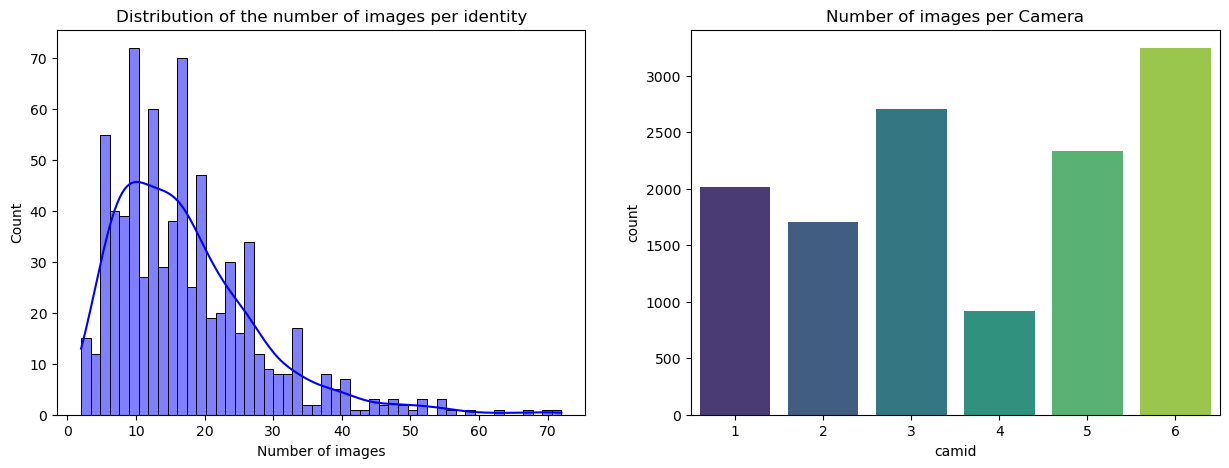

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_train.groupby('pid').size(), bins=50, kde=True, color='blue')
plt.title("Distribution of the number of images per identity")
plt.xlabel("Number of images")

# Répartition par caméra
plt.subplot(1, 2, 2)
sns.countplot(data=df_train, x='camid', palette='viridis')
plt.title("Number of images per Camera")
plt.show()

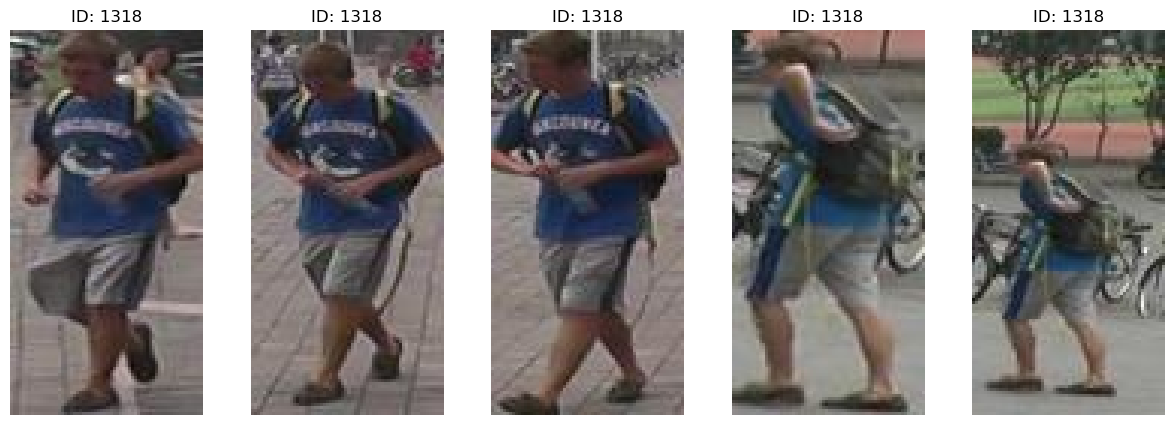

In [8]:
def show_person(df, pid, n=5):
    person_imgs = df[df['pid'] == pid]['path'].iloc[:n]
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(person_imgs):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"ID: {pid}")
    plt.show()

# Display images of a random person
random_pid = df_train['pid'].sample(1).iloc[0]
show_person(df_train, random_pid)